In [1]:
import sys 
import os
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp



In [4]:
#import data and some preprocessing#

datapath  = "/Users/colada/work_dir/Hack4Good/data/"
filename  = "Helvetas_H4G2020.csv"
file_path = "{}{}".format(datapath, filename)

df          = pd.read_csv(file_path, sep = ";")
df_birth    = df.assign(**{"first_donation_year": df.apply(lambda x: int(x["first_donation"][0:4]), axis = 1),
                          "database_year" : df.apply(lambda x: int(x["andat"][0:4]), axis = 1)}).loc[df.gebjah != 0]
df_birth_cl = df_birth.loc[df_birth.gebjah >=1900]



NameError: name 'pd' is not defined

In [4]:
#take feasible numerical attribute for each individual #
#or possible indication of name? location?#

col_num = ["gebjah", "qty_donations", "LTV_donations",
           "database_year", "active_member", "has_been_member", "first_donation_year"]
col_all = ["vname", "land", "plz", "gebjah", "qty_donations", "LTV_donations",
           "database_year", "active_member", "has_been_member", "first_donation_year"]
df_numerical = df_birth_cl[col_num]

Text(0, 0.5, 'frequency')

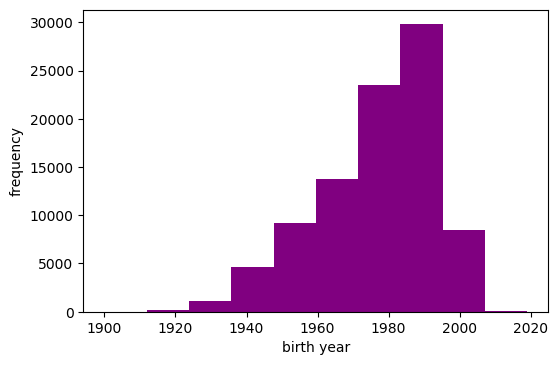

In [5]:
#distribtuion of birthyear#
plt.figure(figsize = (6,4), dpi = 100)
hist,bins = np.histogram(df_birth_cl.gebjah)
plt.bar(bins[:-1], hist, width=(bins[-1]-bins[-2]), align="edge", color = "purple")
plt.xlabel("birth year")
plt.ylabel("frequency")

In [190]:
#data preprocessing#
#train test split#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
random_state = None
label = "gebjah"
features = [ "qty_donations", "LTV_donations",
           "database_year", 
            "active_member", "has_been_member", 
            "first_donation_year"]
X = np.array(df_numerical[features])
y = np.array(df_numerical[label])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_state)




In [174]:
#training regressional models
#1. Random Forest

from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

regr_rf = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators = 100))
# regr_rf = RandomForestRegressor(n_estimators = 100)
regr_rf.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [191]:
from sklearn.linear_model import SGDRegressor
regr_sgd = make_pipeline(StandardScaler(), SGDRegressor(loss= "huber", max_iter = 5000))
regr_sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='huber', max_iter=5000, n_iter_no_change=5,
                              penalty='l2', power_t=0.25, random_state=None,
                              shuffle=True, tol=0.001, validation_fraction=0.1,
                              verbose=0, warm_start=False))],
         verbose=False)

In [192]:
#performance evaluation#
from sklearn.metrics import mean_squared_error, r2_score

decision_model  = regr_sgd
y_pred          = decision_model.predict(X_test)
mean_squared_error(y_pred,y_test, squared=False)
# r2_score(y_pred, y_test)

15.100605455535858

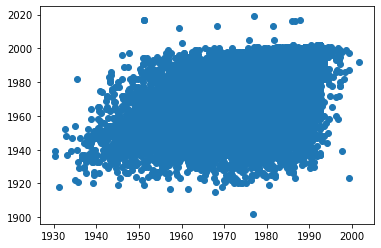

In [185]:
plt.scatter(y_pred, y_test)


In [ ]:
#2. Random Forest 

In [88]:
# df_birth_cl.andat == df_birth_cl.first_donation

14        False
18        False
51        False
56        False
63        False
          ...  
323583    False
323584    False
323585    False
323601    False
323602    False
Length: 90762, dtype: bool

<BarContainer object of 10 artists>

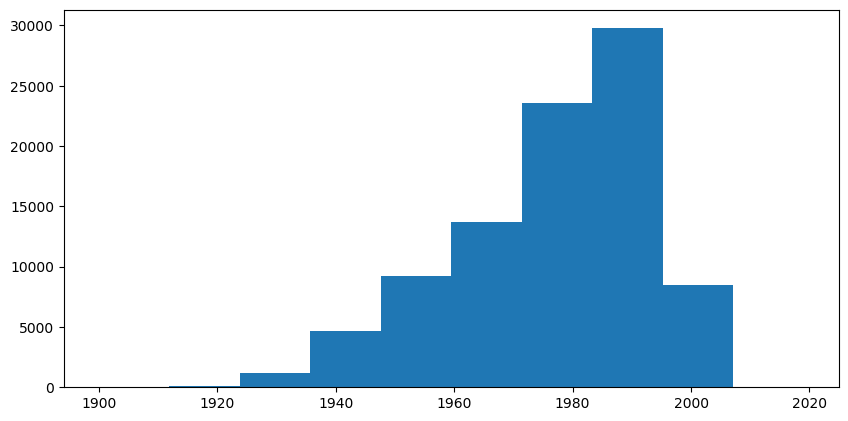

In [69]:
# bars = np.array(np.arange(1920,2020, 10))
# plt.hist(bars, df_birth.gebjah)
# bars
plt.figure(figsize = (10,5), dpi = 100)
hist,bins=np.histogram(df_birth_cl.gebjah)
plt.bar(bins[:-1], hist, width=(bins[-1]-bins[-2]), align="edge")


In [80]:
first_donation_year = df_birth_cl.first_donation.apply(lambda x: int(x[0:4]))
last_donation_year  = df_birth_cl.last_donation.apply(lambda x: int(x[0:4]))

(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 <a list of 9 Text xticklabel objects>)

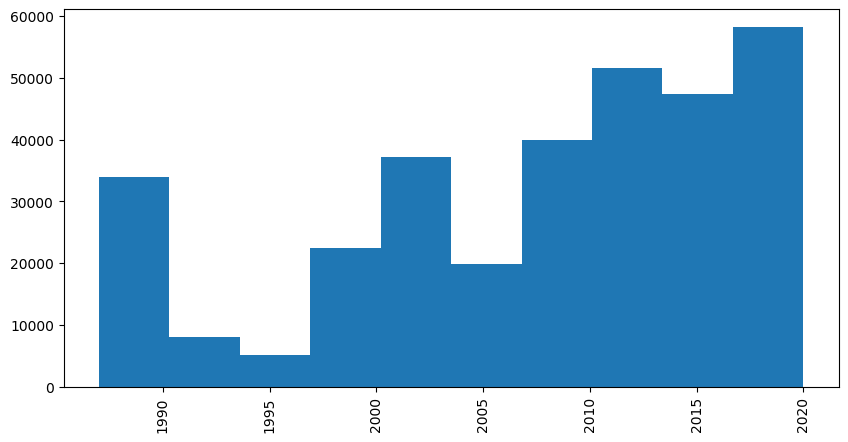

In [67]:
plt.figure(figsize = (10,5), dpi = 100)
plt.hist(first_donation_year)
plt.xticks(rotation = 90)

SpearmanrResult(correlation=0.4559522539150118, pvalue=0.0)

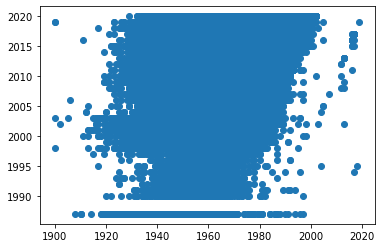

In [85]:
from scipy.stats import pearsonr, spearmanr
x  = df_birth_cl.gebjah
y  = first_donation_year
y2 = last_donation_year
plt.scatter(df_birth_cl.gebjah, first_donation_year)

sp.stats.pearsonr(x, y)
sp.stats.spearmanr(x,y )